In [1]:
import numpy as np
import matplotlib
from matplotlib import transforms, pyplot as plt

%matplotlib inline

In [2]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

In [3]:
# matplotlib doesn't have a function for drawing text with
# different colors, let's implement it
def rainbow_text(x, y, text, colors, spacing=20, ax=None, **kw):
    colors = list(reversed(colors))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, line in enumerate(reversed(text.split('\n'))):
        strings = line.split('||')
        for s, c in zip(strings, colors[i]):
            text = ax.text(x, y, s, color=c, transform=t, **kw)
            text.draw(canvas.get_renderer())
            ex = text.get_window_extent()
            t = transforms.offset_copy(text._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * spacing, 
                                   units='dots')

In [4]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

In [52]:
# survey responses
X = ['Комфортные условия труда', '\nСоциальный пакет', 
     'Компания делает миру лучше', 'Профессиональный рост',
     'Современные технологии', '\nИнтересные задачи', 'Отношения с коллегами',
     '\nКарьерный рост', 'Адекватная зарплата', 'Связь с топ-менеджментом',
     '\nПризнание результатов труда', 'Грамотность менеджмента']
Y = [4.6, 3.8, 4.7, 4.7, 4.7, 4.7, 4.8, 4.6, 4.5, 4.6, 4.6, 4.3]
Z = [4.8, 4.8, 4.7, 4.5, 4.4, 4.4, 4.3, 4.3, 3.9, 3.8, 3.8, 3.7]

Text(-0.18,3.55,'По данным портала "Мой круг" на YYYY-MM-DD. SMALL - усреднённая оценка 11 компаний\nс 10-100 сотрудниками. В опросе участвовало XX сотрудников компании Яндекс.')

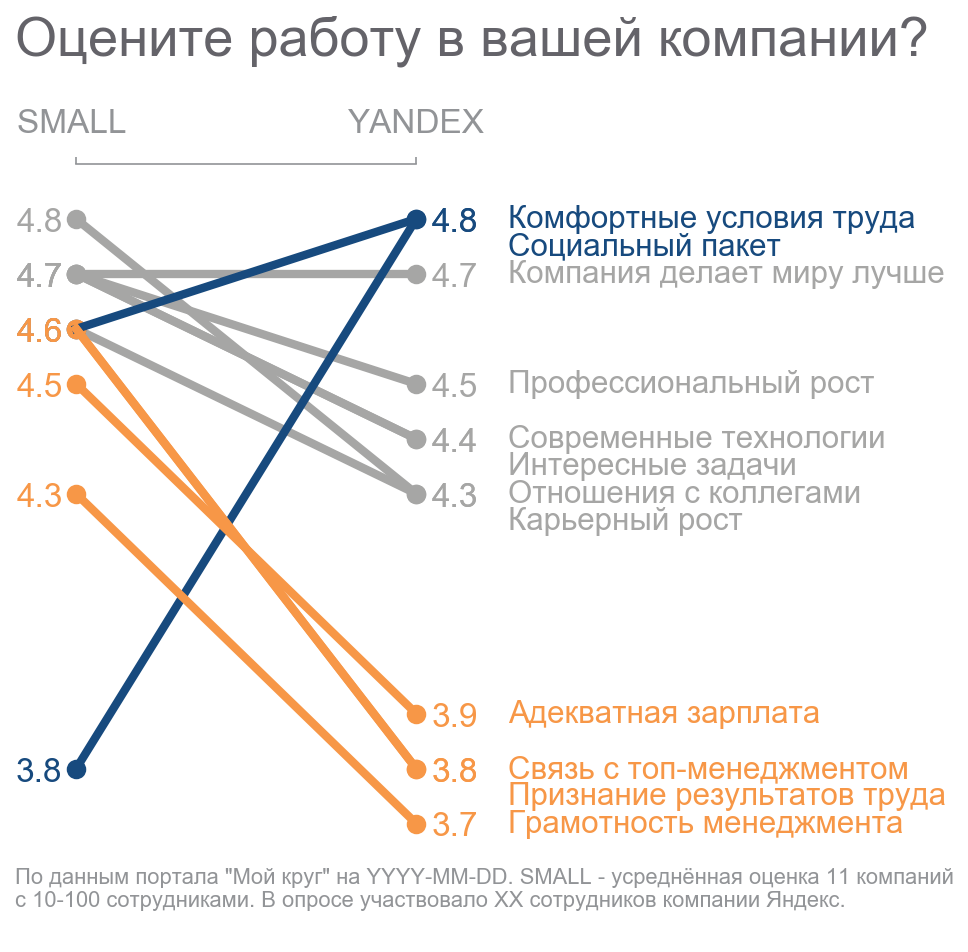

In [98]:
fig, ax1 = plt.subplots(figsize=(7, 9), dpi=150)
plt.subplots_adjust(left=0.065, right=0.43, top=0.76, bottom=0.19)

ax2 = ax1.twinx()
ax2.set_ylim([3.5, 4.9])
ax1.set_ylim([3.5, 4.9])

C = [BLUE1, BLUE1, GRAY8, GRAY8, GRAY8, GRAY8, GRAY8, GRAY8, 
     ORANGE1, ORANGE1, ORANGE1, ORANGE1]

for i in range(len(X)):
    ax1.scatter([0, 1], [Y[i], Z[i]], color=C[i], s=70)
    if C[i] == GRAY8:
        ax1.plot([0, 1], [Y[i], Z[i]], color=C[i], linewidth=4, zorder=0)
    else:
        ax1.plot([0, 1], [Y[i], Z[i]], color=C[i], linewidth=4)
    plt.text(1.27, Z[i], X[i], fontsize=15, linespacing=2.1, color=C[i], verticalalignment='center')

plt.setp(ax1,
         xticks=[0, 1],
         xticklabels=['SMALL ', 'YANDEX'],
         yticks=Y,
         yticklabels=Y)
plt.setp(ax2,
         yticks=Z,
         yticklabels=Z)
ax1.tick_params(top=True, bottom=False, left=False, right=False,
                labelbottom=False, labeltop=True)
ax2.tick_params(top=True, bottom=False, left=False, right=False)


# remove chart border
for ax in (ax1, ax2):
    for spine in ax.spines.values():
        spine.set_visible(False)

for ax, xshift in ((ax1, 0.15), (ax2, -0.14)):
    for i, item in enumerate(ax.get_yticklabels()):
        item.set_fontsize(16)
        item.set_color(C[i])
        offset = transforms.ScaledTranslation(xshift, 0, fig.dpi_scale_trans)
        item.set_transform(item.get_transform() + offset)

for item in ax1.get_xticklabels():
    item.set_fontsize(16)
    item.set_color(GRAY7)
    offset = transforms.ScaledTranslation(0, +0.07, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# change x ticks color
ax1.tick_params(axis='x', colors=GRAY7)
# add bottom spine with gray color and bounds between 0 and 1
ax1.spines['top'].set_visible(True)
ax1.spines['top'].set_bounds(0, 1)
ax1.spines['top'].set_color(GRAY7)

# add survey question
plt.text(-0.18, 5.1, 'Оцените работу в вашей компании?', fontsize=26, 
         color=GRAY4)

# add footnote with the data source
plt.text(-0.18, 3.55,
         'По данным портала "Мой круг" на YYYY-MM-DD. '
         'SMALL - усреднённая оценка 11 компаний\nс 10-100 '
         'сотрудниками. В опросе участвовало XX сотрудников '
         'компании Яндекс.',
         fontsize=10.5,
         color=GRAY7)